In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


"Exploratory Data analysis of IPL Matckes"-Part 1

Objectives:- 
1. find the team which had won maximum matches.
2. Analyze the team which had loss maximum matches.
3. whcih Player has won "Man of Match"  maximum no. of times?
4. Find which City has hosted maximum no of ipl matches.
5. Find the most winning team for each season.
6. Find the on-field umpire with maximum no of ipl matches.
7. Find the biggest victories in IPL while defending the total and while chasing a total.
8. Does the chance of winning toss have any probability of winning the game.

**"DATA PREPARATION AND CLEANING"**

In [2]:
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as ss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
ss.set(style = 'whitegrid')

In [3]:
import numpy as np
import pandas as pd
ipl_Matches = pd.read_csv('/kaggle/input/ipl/matches.csv')
ipl_Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl_Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


**"There are 636 rows(records) and 18 columns(fields),it means there were 636 ipl matches held from 2008 till 2017"**

In [5]:
ipl_Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
ipl_Matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


Insights the describe function has given :-
1. The biggest margin of victory for the team which is batting FIRST is 146 runs (column win_by_runs)
2. The biggest victory of team batting second is by 10 wickets .(column win_by_wickets)
3. 75% of winning teams that bat first won by a margin of 20 runs.
4. 75% of winning teams that bat second won by a margin of 6 wickets.

In [7]:
ipl_Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants.**

In [8]:
ipl_Matches['winner'] = ipl_Matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl_Matches['team1'] = ipl_Matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl_Matches['team2'] = ipl_Matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [9]:
for col in ipl_Matches:
    print(ipl_Matches[col].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

"The dataset has 18 columns which are framed as :- 
1. id: The IPL match ID
2. season : The IPL seaason
3. city : City where ipl match has taken place
4. date: The date on which the match was held **
5. team1: one team out of all the teams 
6. team2: opposition of team1
7. toss_winner: The team that won the toss 
8. toss_decision: decision taken by the toss_winner
9. result: self explanatory
10. winner:self explanatory
11. dl_applied: (1 or 0 ) indicates whether the Duckworth-kewis rule was applied or not
12. win_by_run: shows runs by which team who was batting first had won .
13. win_by_wickets: shows the wickets by which team who was batting second had won.

In [10]:
ipl_Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

**It shows that there are 636 null values in umpire3 column in dataset so, it is best to remove that column**

In [11]:
ipl_Matches = ipl_Matches.drop(columns=['umpire3'],axis=1)

In [12]:
ipl_Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


**"Once the data is cleaned we are good to go in-depth analysis and Visualisation"**

In [13]:
import matplotlib
import seaborn as ss
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
ss.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Q1. Team with most no of wins per season

In [14]:
teams_per_season = ipl_Matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [15]:
teams_per_season = ipl_Matches.groupby('season')['winner'].value_counts()
teams_per_season
"""
for i, v in win_per_season.iteritems():
print(i,v)

for items in win_per_season.iteritems():
print(items)
"""
year = 2008
win_per_season_DF = pd.DataFrame(columns=['year','team','wins'])
for items in teams_per_season.iteritems():
    if items[0][0] == year:
        print(items)
        win_series = pd.DataFrame({
            'year':[items[0][0]],
            'team':[items[0][1]],
            'wins':[items[1]]
        })
        win_per_season_DF = win_per_season_DF.append(win_series)
        year = year + 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)


In [16]:
win_per_season_DF

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


"THe number of wins is a discrete value. This implies that we must plot bar chart " 

<AxesSubplot:xlabel='wins', ylabel='team'>

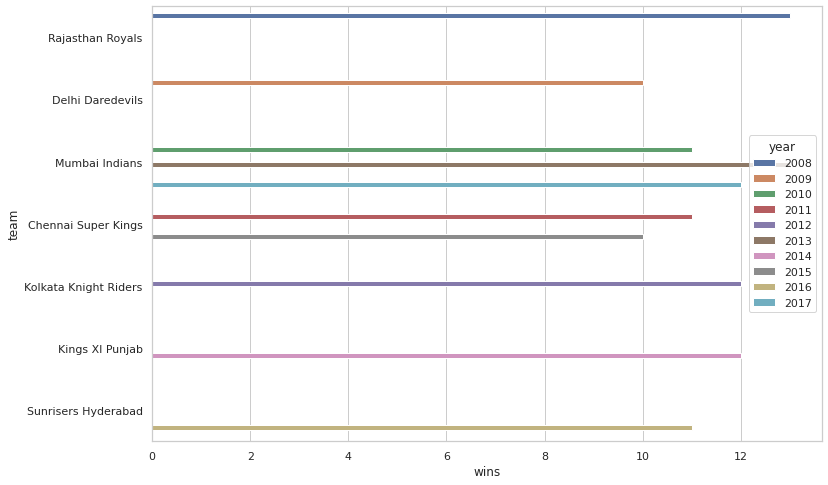

In [18]:
ss.barplot('wins','team',hue = 'year',data = win_per_season_DF)

**Venue that hosted maximum no of ipl matches**

In [19]:
venue_matches = ipl_Matches['venue'].value_counts()
venue_matches

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [20]:
venue_DF = pd.DataFrame(columns=['venue','matches'])
for items in venue_matches.iteritems():
    temp_DF = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_DF = venue_DF.append(temp_DF,ignore_index=True)

<AxesSubplot:title={'center':'IPL Venues'}, xlabel='matches', ylabel='venue'>

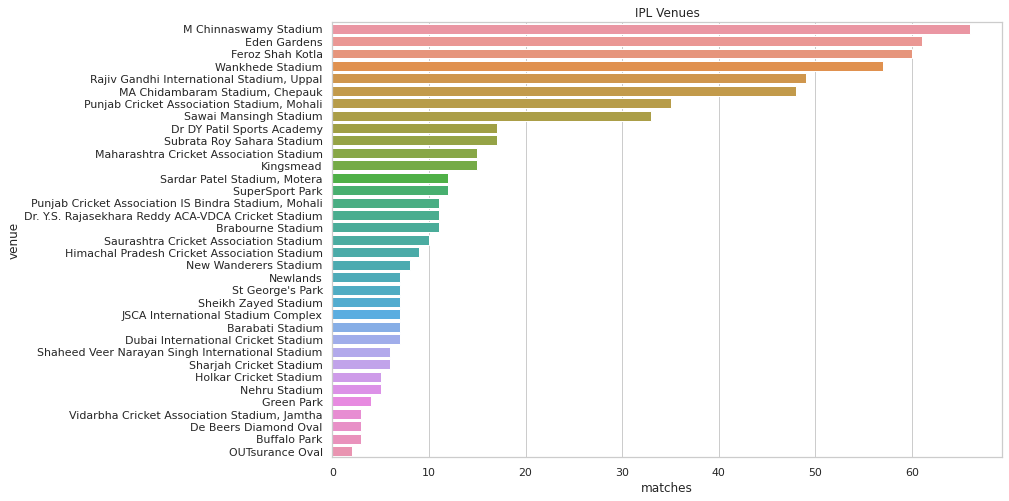

In [21]:
plt.title("IPL Venues")
ss.barplot(x='matches',y='venue',data=venue_DF)

In [22]:
venue_DF

,venue,matches
0,M Chinnaswamy Stadium,66
1,Eden Gardens,61
2,Feroz Shah Kotla,60
3,Wankhede Stadium,57
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,"Punjab Cricket Association Stadium, Mohali",35
7,Sawai Mansingh Stadium,33
8,Dr DY Patil Sports Academy,17
9,Subrata Roy Sahara Stadium,17


**"M Chinnaswamy Stadium has hosted the maximum number of IPL matches followed by Eden Gardens and Feroz Shah Kotla"**

**" Till 2017, IPL matches were hosted by 40 venues"**

**Most successfull IPL team**

In [23]:
team_wins_season = ipl_Matches['winner'].value_counts()

team_wins_DF = pd.DataFrame(columns=['team','wins'])
for items in team_wins_season.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_DF = team_wins_DF.append(temp_df1,ignore_index=True)

In [24]:
team_wins_DF

,team,wins
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Rising Pune Supergiants,15


<AxesSubplot:title={'center':'Total Victories of IPL teams'}, xlabel='wins', ylabel='team'>

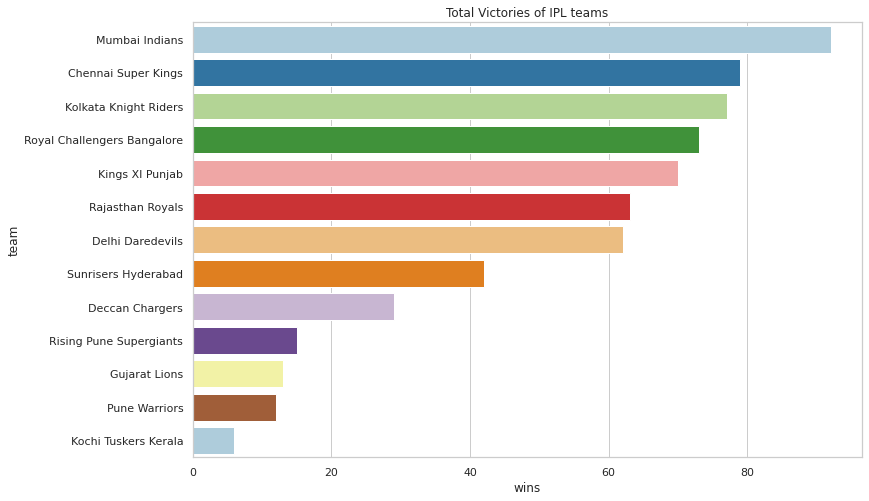

In [25]:
plt.title("Total Victories of IPL teams")
ss.barplot(x='wins',y='team',data=team_wins_DF,palette='Paired')

**Data Visualisation Insights -
Mumbai Indians appears to be most successfull team till 2017 with 92 wins followed by Chennai super kings(wins =79) and Kolkata knight riders(wins = 77)**

**Looking forward the most valuable Player,he is player who had won maximum no of player_of_match awards**

In [26]:
mvp_ser = ipl_Matches['player_of_match'].value_counts()
mvp_ten_DF =pd.DataFrame(columns= ['player','wins'])
count=0
for items in mvp_ser.iteritems():
    if count > 9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_DF =mvp_ten_DF.append(temp_df2,ignore_index=True)
        count += 1

In [27]:
mvp_ten_DF

,player,wins
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,RG Sharma,14
5,SK Raina,14
6,MS Dhoni,13
7,G Gambhir,13
8,AM Rahane,12
9,MEK Hussey,12


<AxesSubplot:title={'center':'Top 10 IPL PLayers'}, xlabel='wins', ylabel='player'>

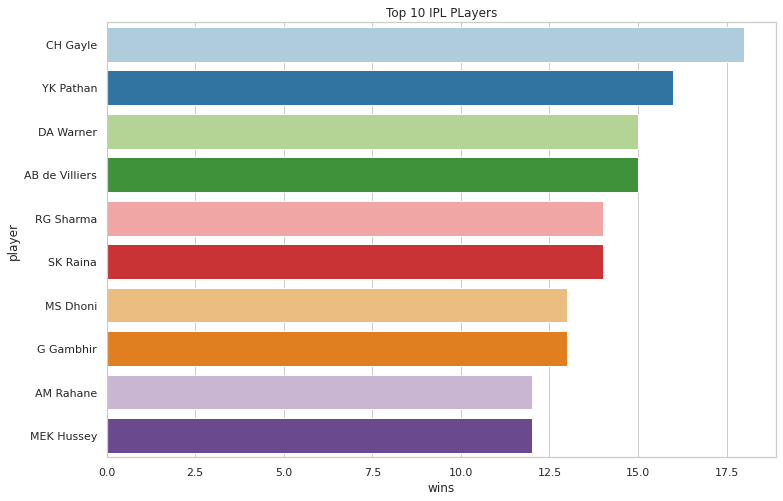

In [28]:
plt.title('Top 10 IPL PLayers')
ss.barplot(x='wins',y='player',data=mvp_ten_DF,palette='Paired')

Insights-
1. Chris Gayle is the player who had won the most player of the match awards and hence is the most valuable player
2. Six players have been figured in the top ten IPL players list.

**Team that won the most number of toss**

In [29]:
toss_ser = ipl_Matches['toss_winner'].value_counts()
toss_DF = pd.DataFrame(columns= ['team','wins'])
for items in toss_ser.iteritems():
    temp_DF3 =pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_DF = toss_DF.append(temp_DF3,ignore_index=True)

In [30]:
toss_DF

,team,wins
0,Mumbai Indians,85
1,Kolkata Knight Riders,78
2,Delhi Daredevils,72
3,Royal Challengers Bangalore,70
4,Kings XI Punjab,68
5,Chennai Super Kings,66
6,Rajasthan Royals,63
7,Deccan Chargers,43
8,Sunrisers Hyderabad,35
9,Pune Warriors,20


<AxesSubplot:title={'center':'Count of winning toss by respective teams'}, xlabel='wins', ylabel='team'>

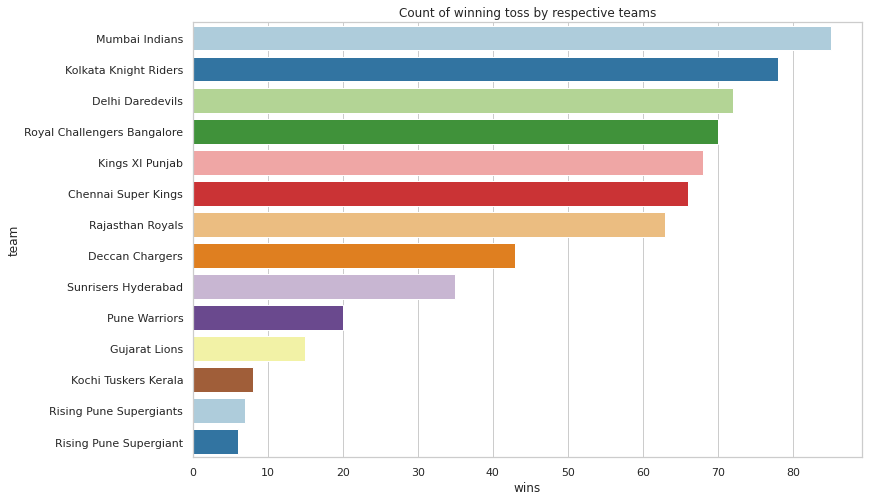

In [31]:
plt.title("Count of winning toss by respective teams")
ss.barplot(x='wins',y='team',data= toss_DF,palette='Paired')

Insights - 
1. Mumbai Indians has won the most toss(till 2017) in ipl history.
2. Since teams Royal challengers banglore , kings XI Punjab ,Delhi Daredevils, has won more tosses than second most match winning  team chennai super kings, this means winning the toss does not predict win of the team. 

Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top two players — Chris Gayle and AB de Villers have never won an IPL. Of the top ten players, 6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.



In [32]:
mvp_ten_DF

,player,wins
0,CH Gayle,18
1,YK Pathan,16
2,DA Warner,15
3,AB de Villiers,15
4,RG Sharma,14
5,SK Raina,14
6,MS Dhoni,13
7,G Gambhir,13
8,AM Rahane,12
9,MEK Hussey,12


**Going in-depth Analysis 
Q1- which umpire has done umpiring in most of the matches**

In [33]:
umpire1_ser = ipl_Matches['umpire1'].value_counts()
umpire2_ser = ipl_Matches['umpire2'].value_counts()
umpires_DF = pd.concat([umpire1_ser,umpire2_ser],axis=1)
umpires_DF

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
BF Bowden,37.0,NaN
S Ravi,36.0,49.0
BR Doctrove,34.0,8.0
M Erasmus,32.0,22.0
RE Koertzen,20.0,21.0
S Asnani,19.0,11.0


In [34]:
umpires_DF.shape

(54, 2)

In [35]:
umpires_ser =umpires_DF.sum(axis=1)
umpires_DF = pd.DataFrame(columns =['umpires','matches'])

for items in umpires_ser.iteritems():
    temp_DF4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpires_DF = umpires_DF.append(temp_DF4,ignore_index=True)

In [36]:
umpires_DF.sort_values('matches',ascending=False).head()

,umpires,matches,umpire
0,NaN,87.0,HDPK Dharmasena
5,NaN,85.0,S Ravi
2,NaN,58.0,AK Chaudhary
29,NaN,56.0,C Shamshuddin
42,NaN,55.0,SJA Taufel


**Which City has hosted the maximum number of IPL matches**

In [37]:
ipl_Matches['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

Mumbai has hosted maximum number of ipl matches

In [38]:
city_ser = ipl_Matches['city'].value_counts()
city_DF = pd.DataFrame(columns = ['city','matches'])
for items in city_ser.iteritems():
    temp_DF6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_DF = city_DF.append(temp_DF6,ignore_index=True)

<AxesSubplot:title={'center':'Cities that hosted IPL matches'}, xlabel='matches', ylabel='city'>

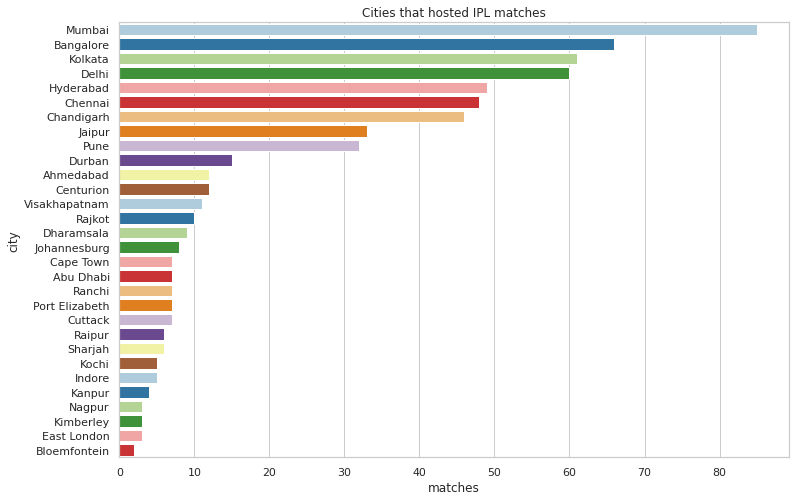

In [39]:
plt.title("Cities that hosted IPL matches")
ss.barplot(x='matches',y='city',data= city_DF,palette="Paired")

**Does winning the toss has any advantage ?**

In [40]:
win_count = 0
for index, value in ipl_Matches.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1 
print(f'The number of times the team winning toss have won :{win_count}')
prob = win_count/len(ipl_Matches)
print('THe probability  of winning if won the toss: {:.2f}'.format(prob))

The number of times the team winning toss have won :320
THe probability  of winning if won the toss: 0.50


**The probability of winning when the team had won the toss  is 51%.
So winning the toss gives slight edge over the opponent.**